# importing the dataset

In [1]:
import numpy as np
import pandas as pd

data=pd.read_csv('C:/Users/Acer/OneDrive/Desktop/New folder (2)/heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [2]:
data.shape

(1025, 14)

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# data preprocessing

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

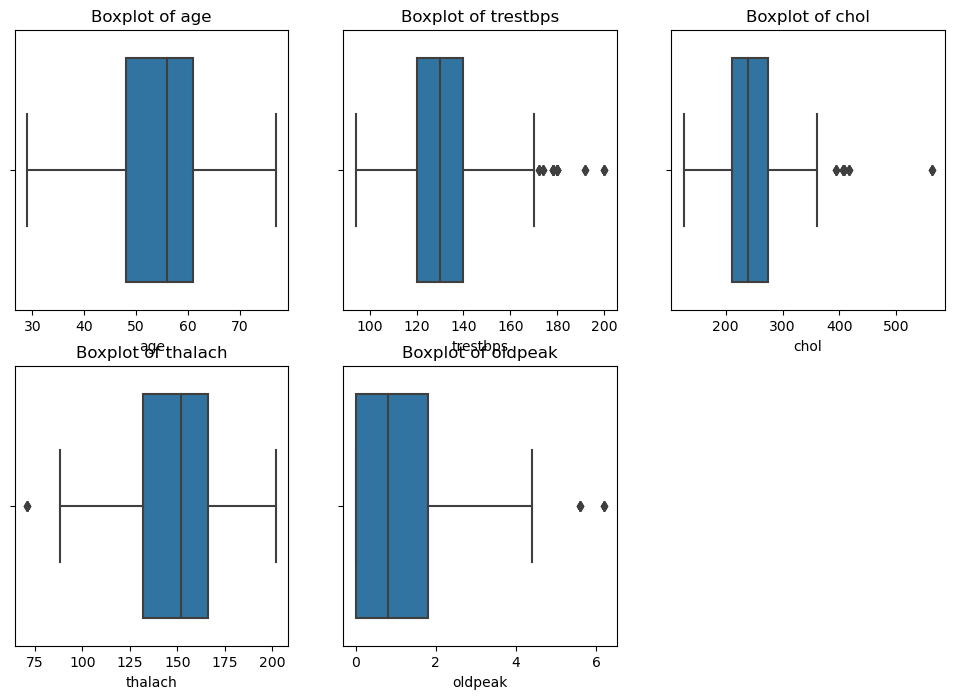

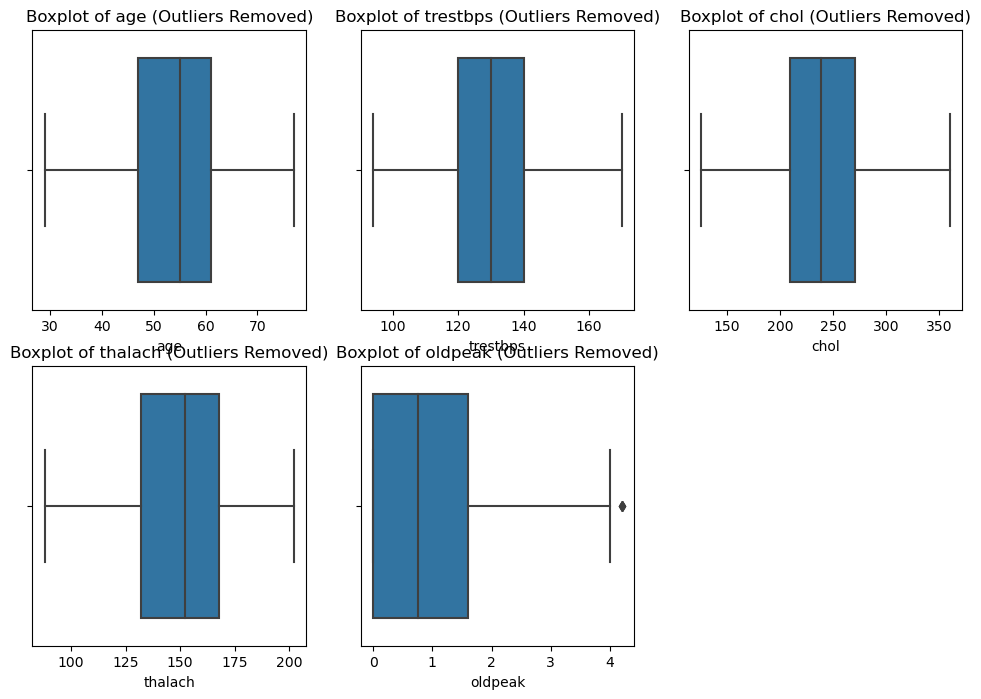

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12, 8))
for i, variable in enumerate(numerical_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[variable])
    plt.title(f'Boxplot of {variable}')
plt.show()

for variable in numerical_variables:
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1

    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR

    data = data[(data[variable] >= LL) & (data[variable] <= UL)]

plt.figure(figsize=(12, 8))
for i, variable in enumerate(numerical_variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[variable])
    plt.title(f'Boxplot of {variable} (Outliers Removed)')

plt.show()


# scaling

In [7]:
data=data.values
data

array([[52.,  1.,  0., ...,  2.,  3.,  0.],
       [53.,  1.,  0., ...,  0.,  3.,  0.],
       [70.,  1.,  0., ...,  0.,  3.,  0.],
       ...,
       [47.,  1.,  0., ...,  1.,  2.,  0.],
       [50.,  0.,  0., ...,  0.,  2.,  1.],
       [54.,  1.,  0., ...,  1.,  3.,  0.]])

In [8]:
x=data[:,0:13]
y=data[:,13]

In [9]:
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [10]:
y

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0.

In [11]:
from sklearn.preprocessing import MinMaxScaler

y=np.reshape(y,(-1,1))

scaler_x= MinMaxScaler()
scaler_y = MinMaxScaler()

x_scaled=scaler_x.fit_transform(x)
y_scaled=scaler_y.fit_transform(y)

# Training the model

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x_scaled, y_scaled,test_size=0.2)

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 

In [15]:
history=model.fit(x_train,y_train,epochs=300,validation_split=0.2,batch_size=64)

Epoch 1/300


10/10 [==============================] - 2s 44ms/step - loss: 0.6769 - accuracy: 0.5844 - val_loss: 0.6412 - val_accuracy: 0.7419
Epoch 2/300
10/10 [==============================] - 0s 13ms/step - loss: 0.6514 - accuracy: 0.6477 - val_loss: 0.5926 - val_accuracy: 0.8000
Epoch 3/300
10/10 [==============================] - 0s 12ms/step - loss: 0.6221 - accuracy: 0.6964 - val_loss: 0.5426 - val_accuracy: 0.8129
Epoch 4/300
10/10 [==============================] - 0s 12ms/step - loss: 0.5678 - accuracy: 0.7338 - val_loss: 0.4920 - val_accuracy: 0.8065
Epoch 5/300
10/10 [==============================] - 0s 9ms/step - loss: 0.5437 - accuracy: 0.7338 - val_loss: 0.4487 - val_accuracy: 0.8258
Epoch 6/300
10/10 [==============================] - 0s 10ms/step - loss: 0.4985 - accuracy: 0.7500 - val_loss: 0.4170 - val_accuracy: 0.8323
Epoch 7/300
10/10 [==============================] - 0s 10ms/step - loss: 0.4683 - accuracy: 0.7857 - val_loss: 0.3960 - val_accuracy: 0.8452
Epoch

In [16]:
y_pred=model.predict(x_test)

7/7 [==============================] - 0s 3ms/step


In [17]:
print('actual:',y_test[:10].T)
print('predictions:',y_pred[:10].T)

actual: [[0. 0. 1. 1. 0. 0. 0. 0. 1. 1.]]
predictions: [[5.7001451e-08 7.4130809e-04 9.9937844e-01 9.9999380e-01 7.4130809e-04
  7.2673478e-10 5.9538439e-04 3.0503795e-09 9.9973536e-01 9.9825561e-01]]


In [18]:
import joblib

joblib.dump(scaler_x,'scaler_x.sav')
joblib.dump(scaler_y,'scaler_y.sav')

['scaler_y.sav']

In [19]:
model.save('heart-predict.model')

INFO:tensorflow:Assets written to: heart-predict.model\assets


INFO:tensorflow:Assets written to: heart-predict.model\assets
